<h1>BREAST CANCER CLASIFICATION</h1>

<h2>Importing All Liberaries</h2>

Source of Dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/download

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

In [4]:
from scipy import stats
from warnings import filterwarnings

In [5]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, SelectFromModel, RFE

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
from sklearn.metrics import precision_recall_curve

In [13]:
from sklearn.preprocessing import StandardScaler, RobustScaler

Many libarary are imported below for ease  

<h2>LOADING THE DATASET</h2>

In [14]:
datax = load_breast_cancer()
print (datax.feature_names)
print (datax.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [15]:
df = pd.read_csv('C:/Users/Aayus/Python/AIML IIT/data.csv')

<h2>PRE-PROCESSING AND ANALYSING

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The dataset has 569 rows and 33 columns. The diagnosis column classifies tumor as 'M' for malignant and 'B' for benign. The last column 'Unnamed:32' has all Nans and will be removed

In [17]:
df.drop(df.columns[[-1, 0]], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [18]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [19]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [20]:
#Get a count of the number of 'M' & 'B' cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

About 59% values in the diagnosis column have been classified as 'M' ie Malignant.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

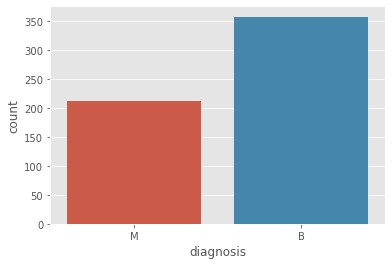

In [21]:
#Visualize this count
sns.countplot(df['diagnosis'],label="Count")

In [29]:
#Look at the data types 
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

There are now 30 features we can visualize. We plot 10 features at a time. This will lead to 3 plots containing 10 features each. The means of all the features are plotted together, so are the standard errors and worst dimensionsAll the columns are numeric except the diagnosis column which has categorical data

There are now 30 features we can visualize.
We plot 10 features at a time. 
This will lead to 3 plots containing 10 features each.
The means of all the features are plotted together, so are the standard errors and worst dimensions

In [30]:
# y includes our labels and x includes our features
y = df.diagnosis                          # M or B 
list = ['diagnosis']
X = df.drop(list,axis = 1 )
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

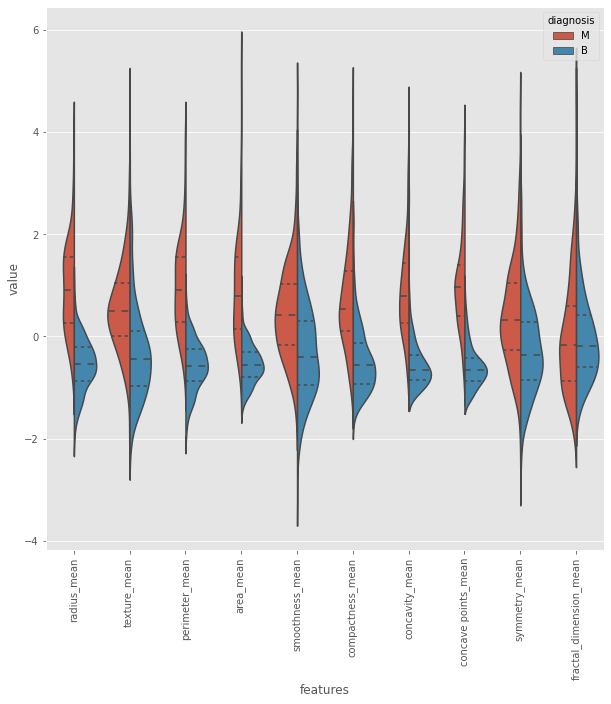

In [32]:
# first ten features
data_dia = y
data = X
data_std = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_std.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

For the texture_mean feature, median of the Malignant and Benign looks separated and away from each other, so it can be good for classification. However, in fractal_dimension_mean feature, median of the Malignant and Benign looks almost the same which might not be good for classification. smoothness_mean seems to have the highest range of values.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

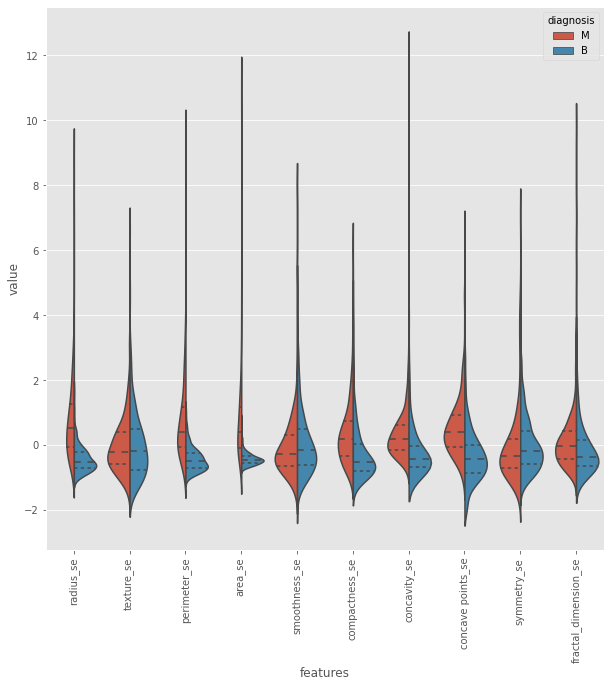

In [33]:
# Second ten features
data = pd.concat([y,data_std.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

The medians for almost all Malignant or Benign don't vary much for all the features above except for maybe concave points_se and concavity_se. smoothness_se or symmetry_se have almost same distribution ie Malignant and Benign sections might not be well separated, making classification difficult! The shape of violin plot for area_se looks wraped. The distribution of data points for benign and laignant in area_se looks very different and varys the most.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

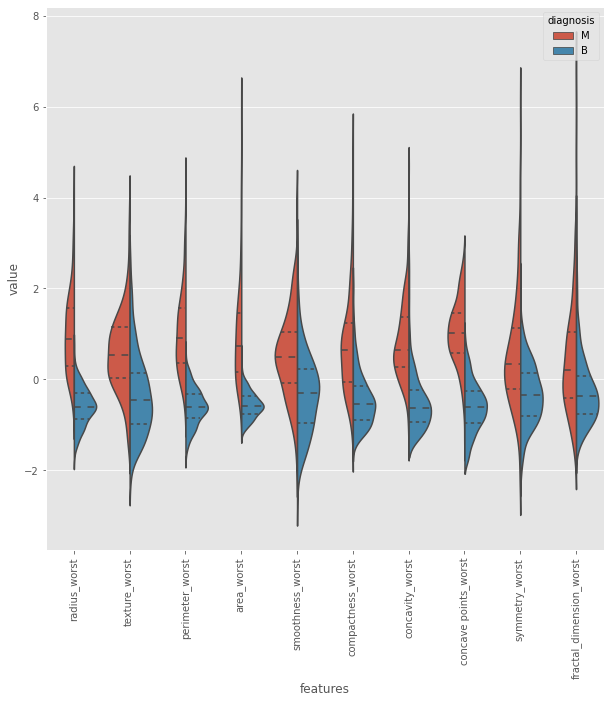

In [34]:
# Last ten features
data = pd.concat([y,data_std.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

area_worst look well separated, so it might be easier to use this feature for classification! Variance seems highest for fractal_dimension_worst. concavity_worst and concave_points_worst seem to have similar data distribution. 

<h3>Checking the corelation of features

AttributeError: 'JointGrid' object has no attribute 'annotate'

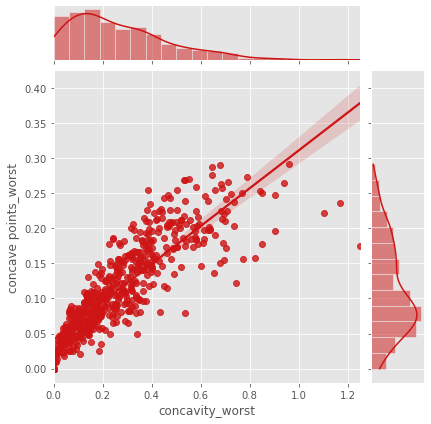

In [35]:
filterwarnings('ignore')
sns.jointplot(X.loc[:,'concavity_worst'], X.loc[:,'concave points_worst'], kind="reg", color="#ce1414").annotate(stats.pearsonr)

concavity_worst and concave points_worst show high correlation of 0.86 and a significant p-value

<AxesSubplot:>

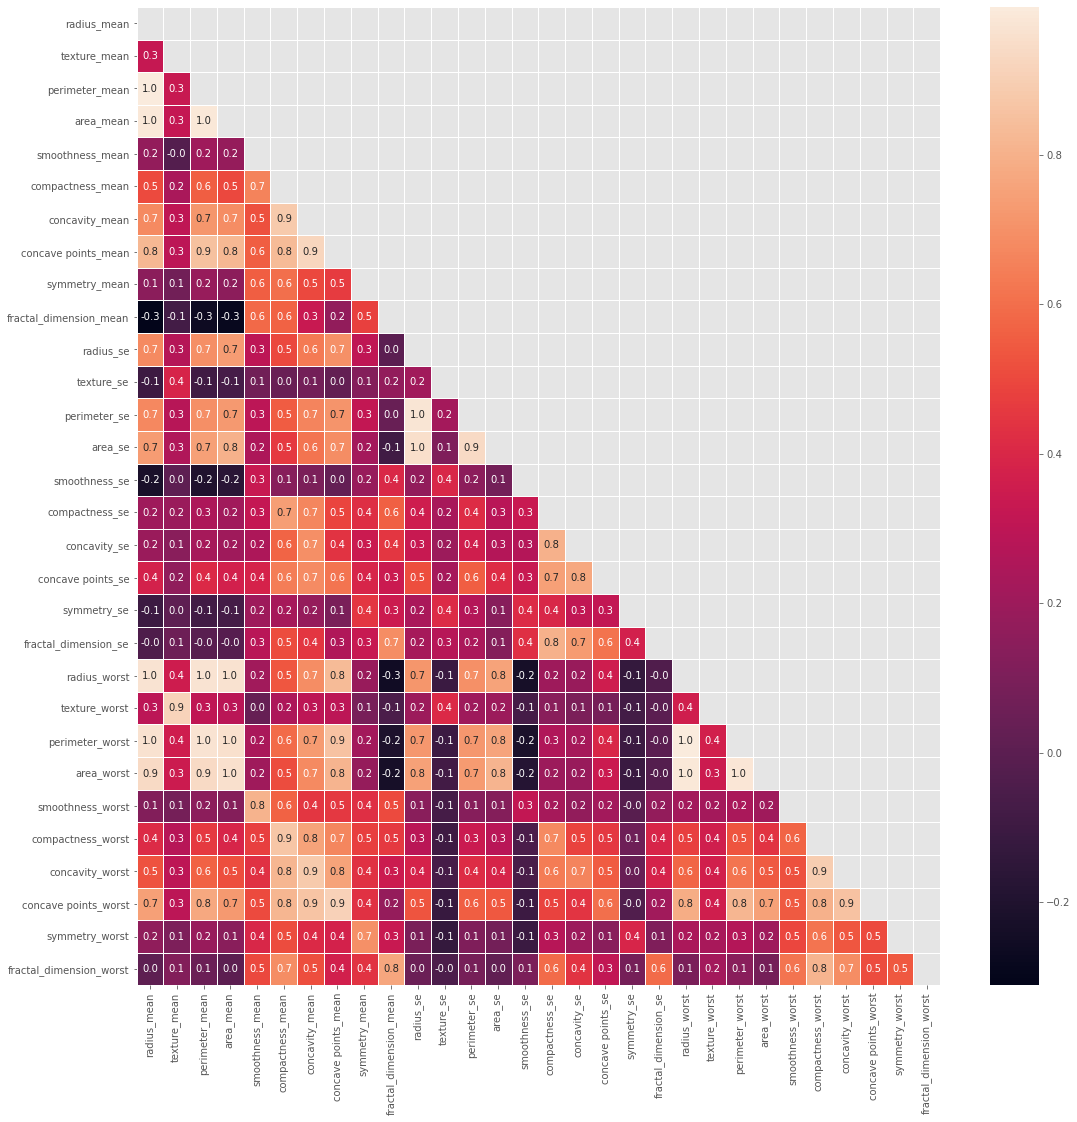

In [36]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)

Compactness_mean, concavity_mean and concave points_mean are correlated with each other. Apart from these, radius_se, perimeter_se and area_se are correlated. radius_worst, perimeter_worst and area_worst are correlated. Compactness_worst, concavity_worst and concave points_worst. Compactness_se, concavity_se and concave points_se. texture_mean and texture_worst are correlated. area_worst and area_mean are correlated. radius_worst, perimeter_worst and area_worst with radius_mean, perimeter_mean and area_mean have a correlation of 1

VISUALIZE some features via BOX plots and performed a t test to detect statistical significance

In [37]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Text(0.5, 1.0, 'Graph of texture mean vs diagnosis of tumor')

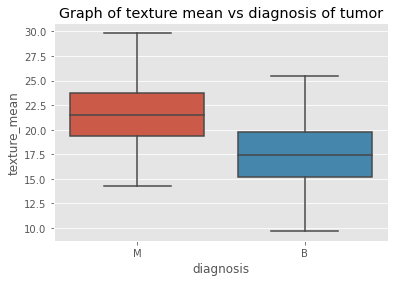

In [38]:
plot_5 = sns.boxplot(x='diagnosis', y='texture_mean', data=df, showfliers=False)
plot_5.set_title("Graph of texture mean vs diagnosis of tumor")

In [39]:
new_d = pd.DataFrame(data=df[['texture_mean', 'diagnosis']])
new_d = new_d.set_index('diagnosis')
stats.ttest_ind(new_d.loc['M'], new_d.loc['B'])

Ttest_indResult(statistic=array([10.86720108]), pvalue=array([4.05863605e-25]))

The p value is significant (<0.01) so we can reject null hypothesis. The difference in means for texture_mean is statistically significant.

Text(0.5, 1.0, 'Graph of fractal dimension mean vs diagnosis of tumor')

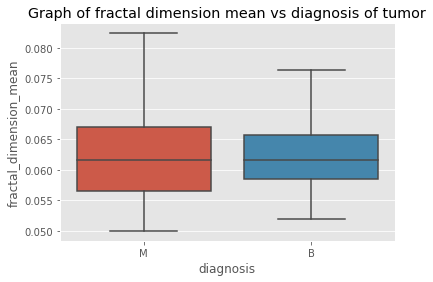

In [40]:
plot_5 = sns.boxplot(x='diagnosis', y='fractal_dimension_mean', data=df, showfliers=False)
plot_5.set_title("Graph of fractal dimension mean vs diagnosis of tumor")

In [41]:
new_d = pd.DataFrame(data=df[['fractal_dimension_mean', 'diagnosis']])
new_d = new_d.set_index('diagnosis')
stats.ttest_ind(new_d.loc['M'], new_d.loc['B'])

Ttest_indResult(statistic=array([-0.30571113]), pvalue=array([0.7599368]))

t statistic is negative so if there is a difference between the M and B samples, it will be in the negative direction, meaning M samples might have lesser means than B samples. However the value of t statistic is very small and p value > 0.01, this means we cannot reject null hypothesis. The difference in means for fractal dimension_mean samples of M and B tumors might not be statitiscally significant.

Text(0.5, 1.0, 'Graph of area se vs diagnosis of tumor')

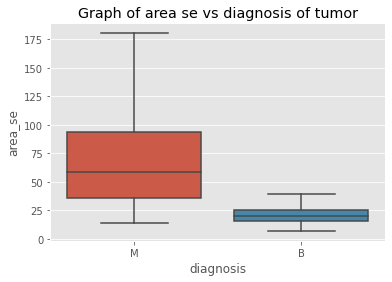

In [42]:
plot_5 = sns.boxplot(x='diagnosis', y='area_se', data=df, showfliers=False)
plot_5.set_title("Graph of area se vs diagnosis of tumor")

In [43]:
new_d = pd.DataFrame(data=df[['area_se', 'diagnosis']])
new_d = new_d.set_index('diagnosis')
stats.ttest_ind(new_d.loc['M'], new_d.loc['B'])

Ttest_indResult(statistic=array([15.6093429]), pvalue=array([5.89552139e-46]))

As expected from the boxplot, p-value is very small which indicates the difference in means for M and B sample is statistically significant.

Text(0.5, 1.0, 'Graph of concave points se vs diagnosis of tumor')

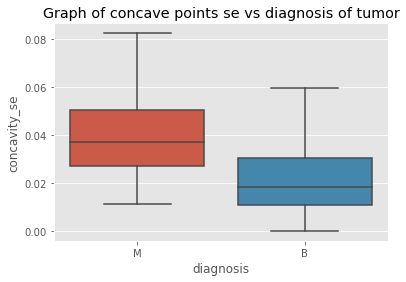

In [44]:
plot_5 = sns.boxplot(x='diagnosis', y='concavity_se', data=df, showfliers=False)
plot_5.set_title("Graph of concave points se vs diagnosis of tumor")

In [45]:
new_d = pd.DataFrame(data=df[['concavity_se', 'diagnosis']])
new_d = new_d.set_index('diagnosis')
stats.ttest_ind(new_d.loc['M'], new_d.loc['B'])

Ttest_indResult(statistic=array([6.24615734]), pvalue=array([8.26017617e-10]))

p-value is small indicating statistical significance between the 2 samples.

Text(0.5, 1.0, 'Graph of radius worst vs diagnosis of tumor')

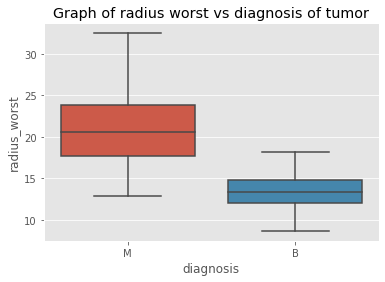

In [46]:
plot_5 = sns.boxplot(x='diagnosis', y='radius_worst', data=df, showfliers=False)
plot_5.set_title("Graph of radius worst vs diagnosis of tumor")

In [47]:
new_d = pd.DataFrame(data=df[['radius_worst', 'diagnosis']])
new_d = new_d.set_index('diagnosis')
stats.ttest_ind(new_d.loc['M'], new_d.loc['B'])

Ttest_indResult(statistic=array([29.33908156]), pvalue=array([8.48229192e-116]))

p-value very small, so the difference in means is statistically significant

Text(0.5, 1.0, 'Graph of area worst vs diagnosis of tumor')

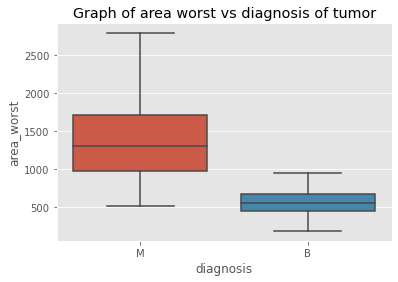

In [48]:
plot_5 = sns.boxplot(x='diagnosis', y='area_worst', data=df, showfliers=False)
plot_5.set_title("Graph of area worst vs diagnosis of tumor")

In [49]:
new_d = pd.DataFrame(data=df[['area_worst', 'diagnosis']])
new_d = new_d.set_index('diagnosis')
stats.ttest_ind(new_d.loc['M'], new_d.loc['B'])

Ttest_indResult(statistic=array([25.72159026]), pvalue=array([2.8288477e-97]))

Very small p-value (<0.01), statitically significant difference in means for M and B samples.

<h3>VIF SCORES for all the FEATURES

In [50]:
# creating copy of series 
new = df.copy(deep=True)

In [51]:
new.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [52]:
new = new.rename(columns= {'concave points_mean': 'concave_points_mean', 'concave points_se':'concave_points_se', 'concave points_worst':'concave_points_worst'})

In [53]:
new

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [54]:
new.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [55]:
# get y and X dataframes based on this regression:
y_vif, X_vif = dmatrices('diagnosis ~ radius_mean + texture_mean + perimeter_mean + area_mean + smoothness_mean + compactness_mean + concavity_mean + concave_points_mean + symmetry_mean + fractal_dimension_mean + radius_se + texture_se + perimeter_se + area_se + smoothness_se +compactness_se + concavity_se + concave_points_se + symmetry_se +fractal_dimension_se + radius_worst + texture_worst +perimeter_worst + area_worst + smoothness_worst +compactness_worst + concavity_worst + concave_points_worst + symmetry_worst + fractal_dimension_worst', new, return_type='dataframe')

In [56]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif["features"] = X_vif.columns

In [57]:
vif.round(1)

,VIF Factor,features
0,1868.2,Intercept
1,3806.1,radius_mean
2,11.9,texture_mean
3,3786.4,perimeter_mean
4,347.9,area_mean
5,8.2,smoothness_mean
6,50.5,compactness_mean
7,70.8,concavity_mean
8,60.0,concave_points_mean
9,4.2,symmetry_mean


The VIF scores are extremely high for a large number of features indicating multicollinearity. Multicollinearity makes it hard to assess the relative importance of independent variables, but it does not affect the usefulness of the regression equation for prediction. Even when multicollinearity is great, the least-squares regression equation can be highly predictive. We are only interested in prediction, multicollinearity is not a problem.

ELIMINATING HIGHLY CORELATED FEATURES

In [58]:
# y includes our labels and x includes our features
y = df.diagnosis                          # M or B 
list = ['diagnosis']
X = df.drop(list,axis = 1 )
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [59]:
# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [60]:
to_drop

['perimeter_mean',
 'area_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst']

In [61]:
# Drop features 
X = X.drop(X[to_drop], axis=1)
X.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

We need to find the optimal number of features for best classification results and the best features for classification too

Transform categorical value of diagnosis column using LabelEncoder

In [62]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [63]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
y= labelencoder_Y.fit_transform(y)
print(labelencoder_Y.fit_transform(y))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

<h2>Feature Selection</h2>

Insert noise in dataset to check how feature selection performs

In [64]:
np.random.seed(100)
E = np.random.uniform(0, 1, size=(len(X), 15))
X = np.hstack((X, E))
print(X.shape)

(569, 38)


train test split the dataset

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

(398, 38)


Try Univariate feature selection: chi2 test

In [66]:
sel_chi2 = SelectKBest(chi2, k=10)    # select 4 features
X_train_chi2 = sel_chi2.fit_transform(X_train, y_train)
print(sel_chi2.get_support())

[ True  True False  True  True  True False False  True False False False
 False False False False  True False  True  True  True False False False
 False False False False False False False False False False False False
 False False]


f test

In [67]:
sel_f = SelectKBest(f_classif, k=10)
X_train_f = sel_f.fit_transform(X_train, y_train)
print(sel_f.get_support())

[ True False False  True  True  True False False  True False False False
 False  True False False  True False  True  True  True False False False
 False False False False False False False False False False False False
 False False]


mutual_info_classif test

In [68]:
sel_mutual = SelectKBest(mutual_info_classif, k=10)
X_train_mutual = sel_mutual.fit_transform(X_train, y_train)
print(sel_mutual.get_support())

[ True False  True  True  True  True False False  True False False False
 False  True False False False False  True  True  True False False False
 False False False False False False False False False False False False
 False False]


SelectFromMode: L1 based feature selection

In [69]:
model_logistic = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000, penalty='l1')
sel_model_logistic = SelectFromModel(estimator=model_logistic)
X_train_sfm_l1 = sel_model_logistic.fit_transform(X_train, y_train)
print(sel_model_logistic.get_support())

[ True  True False False  True False False False  True  True False False
 False False False False  True False  True  True  True False False False
 False False False  True  True  True  True False False False  True False
 False False]


Does not work. Includes noise in features.

RFE on logistic regression

In [70]:
model_logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
sel_rfe_logistic = RFE(estimator=model_logistic, n_features_to_select=10, step=1)
X_train_rfe_logistic = sel_rfe_logistic.fit_transform(X_train, y_train)
print(sel_rfe_logistic.get_support())
print(sel_rfe_logistic.ranking_)

[ True False False False  True False False False  True  True False False
 False False False False False  True  True  True  True  True False False
 False False False False False False False  True False False False False
 False False]
[ 1 18  9 11  1  5  6 19  1  1 26 24 28 20 23 27 14  1  1  1  1  1 10 22
 16 12 15 29  8 21  3  1  4 25 17  7 13  2]


RFE on random Forest

In [71]:
model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=10, step=1)
X_train_rfe_tree = sel_rfe_tree.fit_transform(X_train, y_train)
print(sel_rfe_tree.get_support())
print(sel_rfe_tree.ranking_)

[ True  True False  True  True  True False False  True False False False
 False False False False  True  True False  True  True False False False
 False False False False False False False False False False False False
 False False]
[ 1  1 13  1  1  1 16  2  1 18 17  8  3  7 20  6  1  1  9  1  1  5  4 21
 24 14 10 19 25 28 22 23 15 29 12 27 26 11]


<h2>Before feature selection

In [72]:
model_logistic = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=10000)
model_logistic.fit(X_train, y_train)
predict = model_logistic.predict(X_test)
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

[[97  5]
 [ 4 65]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       102
           1       0.93      0.94      0.94        69

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



<h2>After feature selection

In [73]:
model_logistic = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=17)
model_logistic.fit(X_train_chi2, y_train)

LogisticRegression(class_weight='balanced', random_state=17, solver='liblinear')

In [74]:
X_test_chi2 = sel_chi2.transform(X_test)
print(X_test.shape)
print(X_test_chi2.shape)

(171, 38)
(171, 10)


In [75]:
predict = model_logistic.predict(X_test_chi2)
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

[[98  4]
 [ 5 64]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       102
           1       0.94      0.93      0.93        69

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [76]:
# Create first pipeline for base without reducing features.
ftwo_scorer = make_scorer(fbeta_score, beta=2)
# Create logistic regression
#logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.arange(0, 1, 0.001)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(model_logistic, hyperparameters, cv=5, scoring=ftwo_scorer, verbose=0)

In [77]:
# Fit grid search
best_model = clf.fit(X_train_chi2, y_train)

In [78]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 0.666


In [79]:
predictions = best_model.predict(X_test_chi2)
print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

Accuracy score 0.941520
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       102
           1       0.93      0.93      0.93        69

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

[[97  5]
 [ 5 64]]


<h3>Custom Threholding to increase recall

In [80]:
y_scores = best_model.predict_proba(X_test_chi2)[:, 1]

In [81]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [82]:
def adjusted_classes(y_scores, t):

    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):

    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    print(classification_report(y_test, y_pred_adj))

In [83]:
precision_recall_threshold(p, r, thresholds, 0.40)

     pred_neg  pred_pos
neg        96         6
pos         2        67
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       102
           1       0.92      0.97      0.94        69

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171



In [84]:
list = ['diagnosis']
X = df.drop(list,axis = 1 )
X = X.drop(X[to_drop], axis=1)
X.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, stratify=y, random_state = 17)

In [86]:
#Feature Scaling
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [87]:
'''
from sklearn.preprocessing import LabelBinarizer
df = pd.read_csv('data.csv')
# by default majority class (benign) will be negative
lb = LabelBinarizer()
df['diagnosis'] = lb.fit_transform(df['diagnosis'].values)
targets = df['diagnosis']

df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df, targets, stratify=targets)
'''

"\nfrom sklearn.preprocessing import LabelBinarizer\ndf = pd.read_csv('data.csv')\n# by default majority class (benign) will be negative\nlb = LabelBinarizer()\ndf['diagnosis'] = lb.fit_transform(df['diagnosis'].values)\ntargets = df['diagnosis']\n\ndf.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1, inplace=True)\n\nX_train, X_test, y_train, y_test = train_test_split(df, targets, stratify=targets)\n"

<h3>Train model in Logistic Regression, KNeighborsClassifier, SVM, GaussianNB, Decision Tree and Random Forest

In [88]:
# Define a function which trains models
def models(X_train,y_train):
    
  
  #Using Logistic Regression 
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)

  #Using SVC linear
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)

  #Using SVC rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, y_train)

  #Using DecisionTreeClassifier 
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)
  
  #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    #print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
    print('[1]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
    print('[2]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
    #print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, y_train))
    print('[3]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
    print('[4]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
  
    return log, svc_lin, svc_rbf, tree, forest

In [89]:
model = models(X_train,y_train)

[0]Logistic Regression Training Accuracy: 0.9794721407624634
[1]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9794721407624634
[2]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9824046920821115
[3]Decision Tree Classifier Training Accuracy: 1.0
[4]Random Forest Classifier Training Accuracy: 0.9912023460410557


<h2>Confusion Matrix

In [90]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    
    cm = confusion_matrix(y_test, model[i].predict(X_test))
  
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
  
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()# Print a new line

[[142   1]
 [  2  83]]
Model[0] Testing Accuracy = "0.9868421052631579"

[[141   2]
 [  4  81]]
Model[1] Testing Accuracy = "0.9736842105263158"

[[141   2]
 [  3  82]]
Model[2] Testing Accuracy = "0.9780701754385965"

[[129  14]
 [  5  80]]
Model[3] Testing Accuracy = "0.9166666666666666"

[[139   4]
 [  6  79]]
Model[4] Testing Accuracy = "0.956140350877193"



In [91]:
#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
    print('Model ',i)
  #Check precision, recall, f1-score
    print(classification_report(y_test, model[i].predict(X_test)))
  #Another way to get the models accuracy on the test data
    print(accuracy_score(y_test, model[i].predict(X_test)))
    print()#Print a new line

Model  0
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       0.99      0.98      0.98        85

    accuracy                           0.99       228
   macro avg       0.99      0.98      0.99       228
weighted avg       0.99      0.99      0.99       228

0.9868421052631579

Model  1
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       143
           1       0.98      0.95      0.96        85

    accuracy                           0.97       228
   macro avg       0.97      0.97      0.97       228
weighted avg       0.97      0.97      0.97       228

0.9736842105263158

Model  2
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       143
           1       0.98      0.96      0.97        85

    accuracy                           0.98       228
   macro avg       0.98      0.98      0.98       228
weighte

<h4>From all the models trained and tested above, Random Forest Classifier gives us the best accuracy at 0.986 on the test set. However it seems to make a few wrong predictions for patients who have cancer and those who don't. SVM also performs well with test accuracy of 0.96

We now choose the SVM and Random Forest model for hyper parameter tuning which might improve its performance further, and check with cross validation. We also want to know which and how many important features to include from amongst the 32 features for optimal model performance.

<h2>Grid Search on Logistic Regression

In [92]:
# Create first pipeline for base without reducing features.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
# Create logistic regression
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.arange(0, 1, 0.001)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, scoring=ftwo_scorer, verbose=0)

In [93]:
# Fit grid search
best_model = clf.fit(X_train, y_train)

In [94]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.591


In [95]:
predictions = best_model.predict(X_test)
print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

Accuracy score 0.986842
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       0.99      0.98      0.98        85

    accuracy                           0.99       228
   macro avg       0.99      0.98      0.99       228
weighted avg       0.99      0.99      0.99       228

[[142   1]
 [  2  83]]


Custom Thresholding to increase recall

In [96]:
y_scores = best_model.predict_proba(X_test)[:, 1]

In [97]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [98]:
def adjusted_classes(y_scores, t):
    
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    print(classification_report(y_test, y_pred_adj))

In [99]:
precision_recall_threshold(p, r, thresholds, 0.42)

     pred_neg  pred_pos
neg       141         2
pos         1        84
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       0.98      0.99      0.98        85

    accuracy                           0.99       228
   macro avg       0.98      0.99      0.99       228
weighted avg       0.99      0.99      0.99       228



After thresholding the number of FNs reduce to 1

In [100]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  
    plt.figure(figsize=(8, 8))
    plt.title("Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.axvline(x=.42, color='black')
    plt.text(.39,.50,'Optimal Threshold for best Recall',rotation=90)
    plt.ylabel("Recall Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

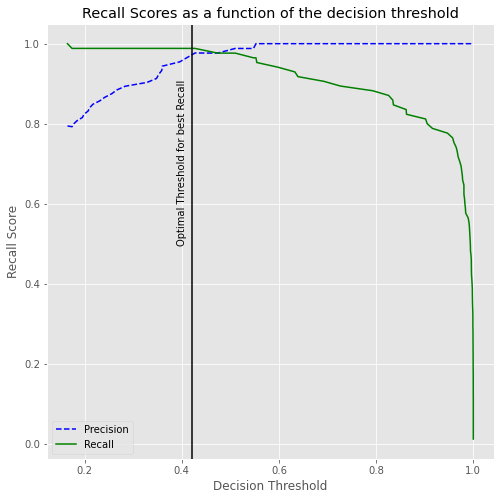

In [101]:
# use the same p, r, thresholds that were previously calculated
plot_precision_recall_vs_threshold(p, r, thresholds)

0.9979432332373509


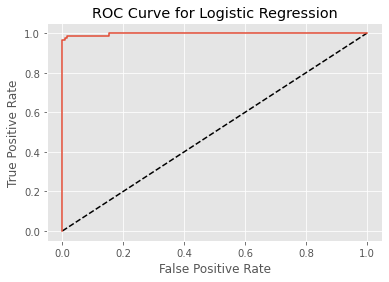

In [102]:
from sklearn import metrics
from sklearn.metrics import roc_curve
# Compute predicted probabilities: y_pred_prob
y_pred_prob = best_model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(metrics.auc(fpr, tpr))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.show()

<h3>Grid Search on Decision tree classifier

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt= DecisionTreeClassifier(random_state=17)

In [104]:
# Define the grid of hyperparameters 'params_dt'
params_dt = {'max_depth': [3, 4, 5, 6],'min_samples_leaf': [0.04, 0.06, 0.08],'max_features': [0.2, 0.4,0.6, 0.8]}

# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring= ftwo_scorer, cv=10, n_jobs=-1)

# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             scoring=make_scorer(fbeta_score, beta=2))

In [105]:
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 3, 'max_features': 0.4, 'min_samples_leaf': 0.06}


In [106]:
# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy', best_CV_score)

Best CV accuracy 0.9223095528179502


In [107]:
# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

In [108]:
predictions = best_model.predict(X_test)

In [109]:
print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

Accuracy score 0.921053
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       143
           1       0.85      0.95      0.90        85

    accuracy                           0.92       228
   macro avg       0.91      0.93      0.92       228
weighted avg       0.93      0.92      0.92       228

[[129  14]
 [  4  81]]


<h3>Custom Threholding to increase recall

In [110]:
y_scores = best_model.predict_proba(X_test)[:, 1]

In [111]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [112]:
precision_recall_threshold(p, r, thresholds, 0.30)

     pred_neg  pred_pos
neg       129        14
pos         4        81
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       143
           1       0.85      0.95      0.90        85

    accuracy                           0.92       228
   macro avg       0.91      0.93      0.92       228
weighted avg       0.93      0.92      0.92       228



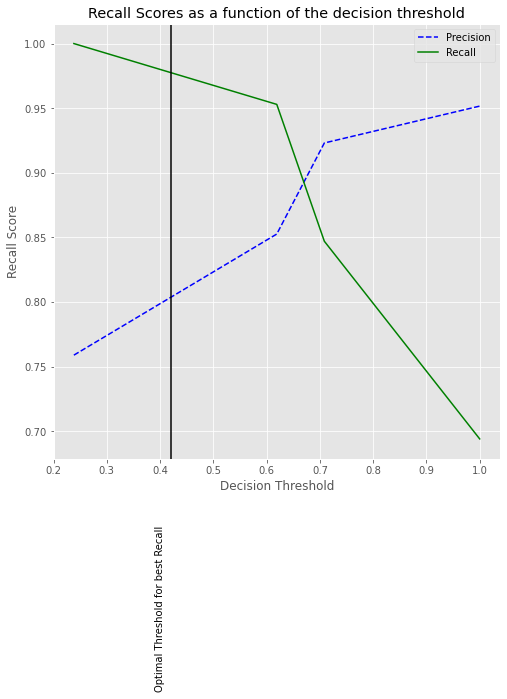

In [113]:
# use the same p, r, thresholds that were previously calculated
plot_precision_recall_vs_threshold(p, r, thresholds)

0.9737556561085974


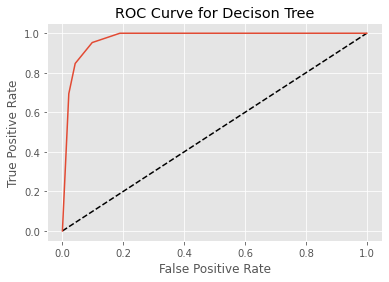

In [114]:
from sklearn import metrics
from sklearn.metrics import roc_curve
# Compute predicted probabilities: y_pred_prob
y_pred_prob = best_model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(metrics.auc(fpr, tpr))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decison Tree')
plt.show()

<h2>Grid Search on SVC

In [115]:
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, GridSearchCV

from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

c_values = np.arange(0, 1, 0.001)
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(random_state=0)
kfold = KFold(n_splits=5, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=ftwo_scorer, cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.955841 using {'C': 0.07100000000000001, 'kernel': 'linear'}


In [116]:
best_model = grid_result.best_estimator_

In [117]:
best_model.fit(X_train, y_train)

SVC(C=0.07100000000000001, kernel='linear', random_state=0)

In [118]:
# estimate accuracy on test dataset
predictions = best_model.predict(X_test)

In [119]:
print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy score 0.982456
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       143
           1       0.99      0.96      0.98        85

    accuracy                           0.98       228
   macro avg       0.98      0.98      0.98       228
weighted avg       0.98      0.98      0.98       228



In [120]:
print(confusion_matrix(y_test, predictions))

[[142   1]
 [  3  82]]


SVM is misclassifying 10 cases amongst the 230 test group.

<h2>Custom Thresholding to increase recall

In [121]:
y_scores = best_model.decision_function(X_test)

In [122]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [123]:
precision_recall_threshold(p, r, thresholds, 0.05)

     pred_neg  pred_pos
neg       143         0
pos         3        82
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       143
           1       1.00      0.96      0.98        85

    accuracy                           0.99       228
   macro avg       0.99      0.98      0.99       228
weighted avg       0.99      0.99      0.99       228



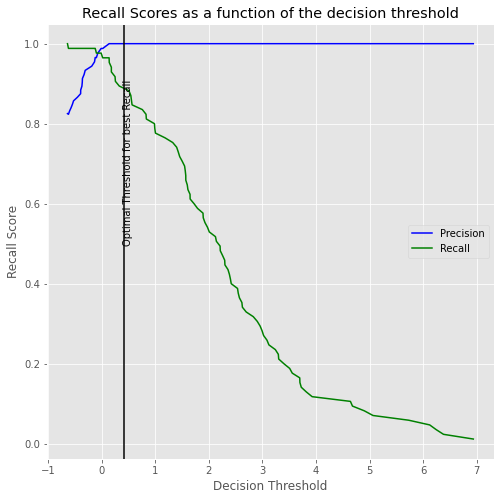

In [124]:

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 
 plt.figure(figsize=(8, 8))
 plt.title("Recall Scores as a function of the decision threshold")
 plt.plot(thresholds, precisions[:-1], "b-", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 plt.axvline(x=.42, color='black')
 plt.text(.39,.50,'Optimal Threshold for best Recall',rotation=90)
 plt.ylabel("Recall Score")
 plt.xlabel("Decision Threshold")
 plt.legend(loc='best')
# use the same p, r, thresholds that were previously calculated
plot_precision_recall_vs_threshold(p, r, thresholds)

0.9981900452488688


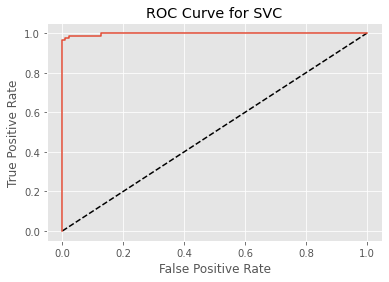

In [125]:
from sklearn import metrics
from sklearn.metrics import roc_curve
# Compute predicted probabilities: y_pred_prob
#y_pred_prob = best_model.(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
print(metrics.auc(fpr, tpr))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC')
plt.show()

<h2>Recursive Feature Elimination for Random Forest Classifier with cross validation

In [126]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
ftwo_scorer = make_scorer(fbeta_score, beta=2)
# split data train 70 % and test 30 %
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring=ftwo_scorer)   #5-fold cross-validation
rfecv = rfecv.fit(X, y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])

Optimal number of features : 13
Best features : Index(['radius_mean', 'texture_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'radius_se', 'concavity_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')


<h3>Include only the best features

In [127]:
#to_drop = ['symmetry_mean', 'smoothness_mean', 'symmetry_se', 'texture_se', 'fractal_dimension_worst']
#X_train_new = X_train.drop(X[to_drop], axis=1)
#X_new.columns
X_new = X[['radius_mean', 'texture_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'radius_se', 'concavity_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst']]

<h3>Train Test Split again

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, stratify=y, random_state = 17)

Scale the dataset Again

In [129]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler, RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Run random forest Again

In [130]:
forest = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 17)
rf = forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print('Accuracy with Scaling: {}'.format(rf.score(X_test, y_test)))

Accuracy with Scaling: 0.951048951048951


In [131]:
confusion_matrix(y_test, y_pred)

array([[89,  1],
       [ 6, 47]], dtype=int64)

<h2>Grid Search on Random Forest

In [132]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    #'accuracy_score': make_scorer(accuracy_score)
}

In [133]:
from sklearn.model_selection import StratifiedKFold
def grid_search_wrapper(refit_score='recall_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {}:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [134]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'max_depth': 5, 'max_features': 5, 'min_samples_split': 5, 'n_estimators': 100}

Confusion matrix of Random Forest optimized for recall_score:
     pred_neg  pred_pos
neg        88         2
pos         3        50


<h3>Custom Threholding to increase recall

In [138]:
y_scores = grid_search_clf.predict_proba(X_test)[:, 1]

In [139]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [140]:
precision_recall_threshold(p, r, thresholds, 0.43)

     pred_neg  pred_pos
neg        86         4
pos         2        51
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



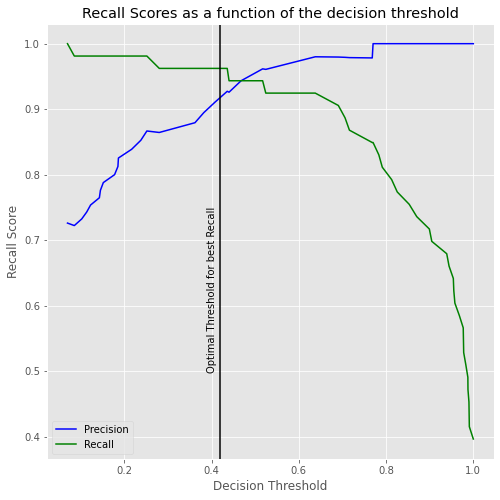

In [141]:
# use the same p, r, thresholds that were previously calculated
plot_precision_recall_vs_threshold(p, r, thresholds)

0.9920335429769391


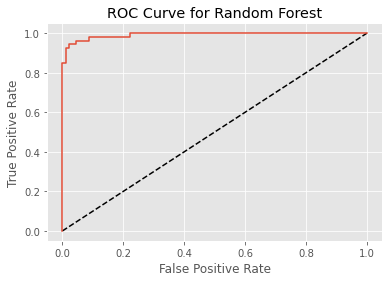

In [142]:
from sklearn import metrics
from sklearn.metrics import roc_curve
# Compute predicted probabilities: y_pred_prob
y_pred_prob = grid_search_clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(metrics.auc(fpr, tpr))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()

Feature ranking:
1. feature 4 (0.219614)
2. feature 12 (0.176088)
3. feature 0 (0.161692)
4. feature 3 (0.108737)
5. feature 11 (0.092519)
6. feature 5 (0.062045)
7. feature 8 (0.046431)
8. feature 1 (0.040450)
9. feature 2 (0.033002)
10. feature 6 (0.019297)
11. feature 9 (0.015469)
12. feature 7 (0.013541)
13. feature 10 (0.011117)


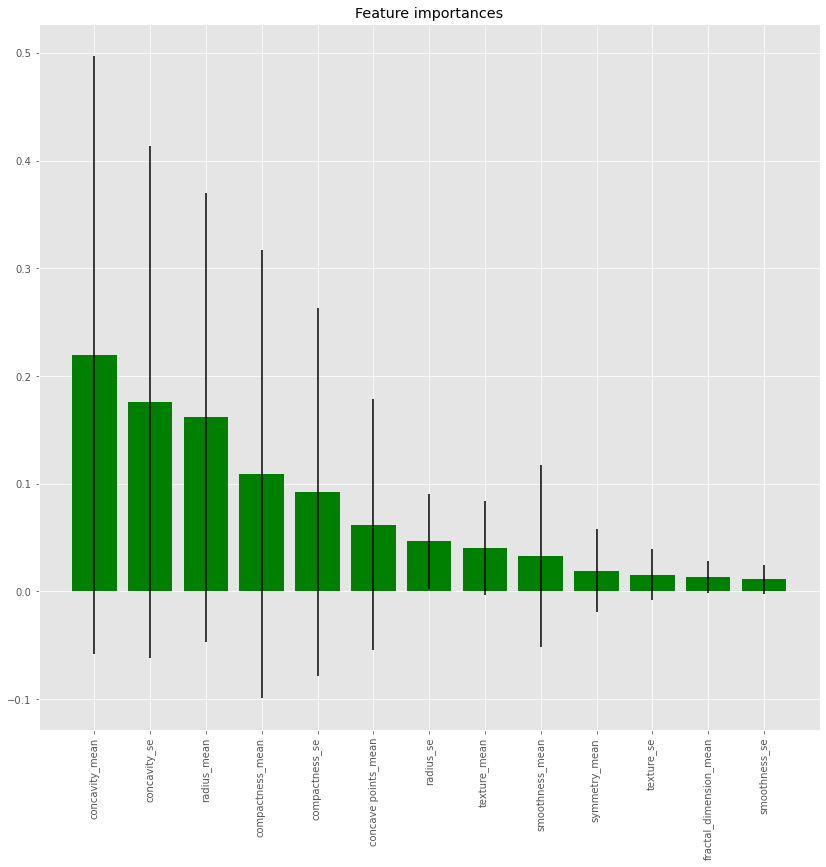

In [143]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()